In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv(r'Walmart_Store_sales.csv')

In [3]:
print(data.columns, data.shape)
data.head()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object') (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


### Check for Missing values

In [6]:
# check for missing values
data.isnull().mean()

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

<b> No Missing values </b>

## Check on Store feature

In [7]:
# Store#
data[data['Store'] == 1].count()

Store           143
Date            143
Weekly_Sales    143
Holiday_Flag    143
Temperature     143
Fuel_Price      143
CPI             143
Unemployment    143
dtype: int64

In [8]:
143*45 #Total number of observations provided

6435

Each store has 143 observations

## Transform Date feature from string to datettime format

In [9]:
print(data['Date'].dtype)
print(data['Date'].head(2))

object
0    05-02-2010
1    12-02-2010
Name: Date, dtype: object


In [10]:
x = '01-12-2010'
y = datetime.strptime(x, '%d-%m-%Y')
print(y)

2010-12-01 00:00:00


In [11]:
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print(data['Date'].dtype)
print(data['Date'].head(2))

datetime64[ns]
0   2010-02-05
1   2010-02-12
Name: Date, dtype: datetime64[ns]


## Weekly sales

In [12]:
data['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:ylabel='Density'>

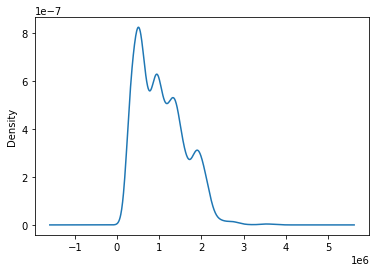

In [13]:
data['Weekly_Sales'].plot(kind='kde')

Distribution of weekly sales is positively skewed

In [14]:
print('Min of weekly sales :', data['Weekly_Sales'].min())
print('Mean of weekly sales:', data['Weekly_Sales'].mean())
print('Max of weekly sales :', data['Weekly_Sales'].max())

Min of weekly sales : 209986.25
Mean of weekly sales: 1046964.8775617732
Max of weekly sales : 3818686.45


## Visualize the features to understand further

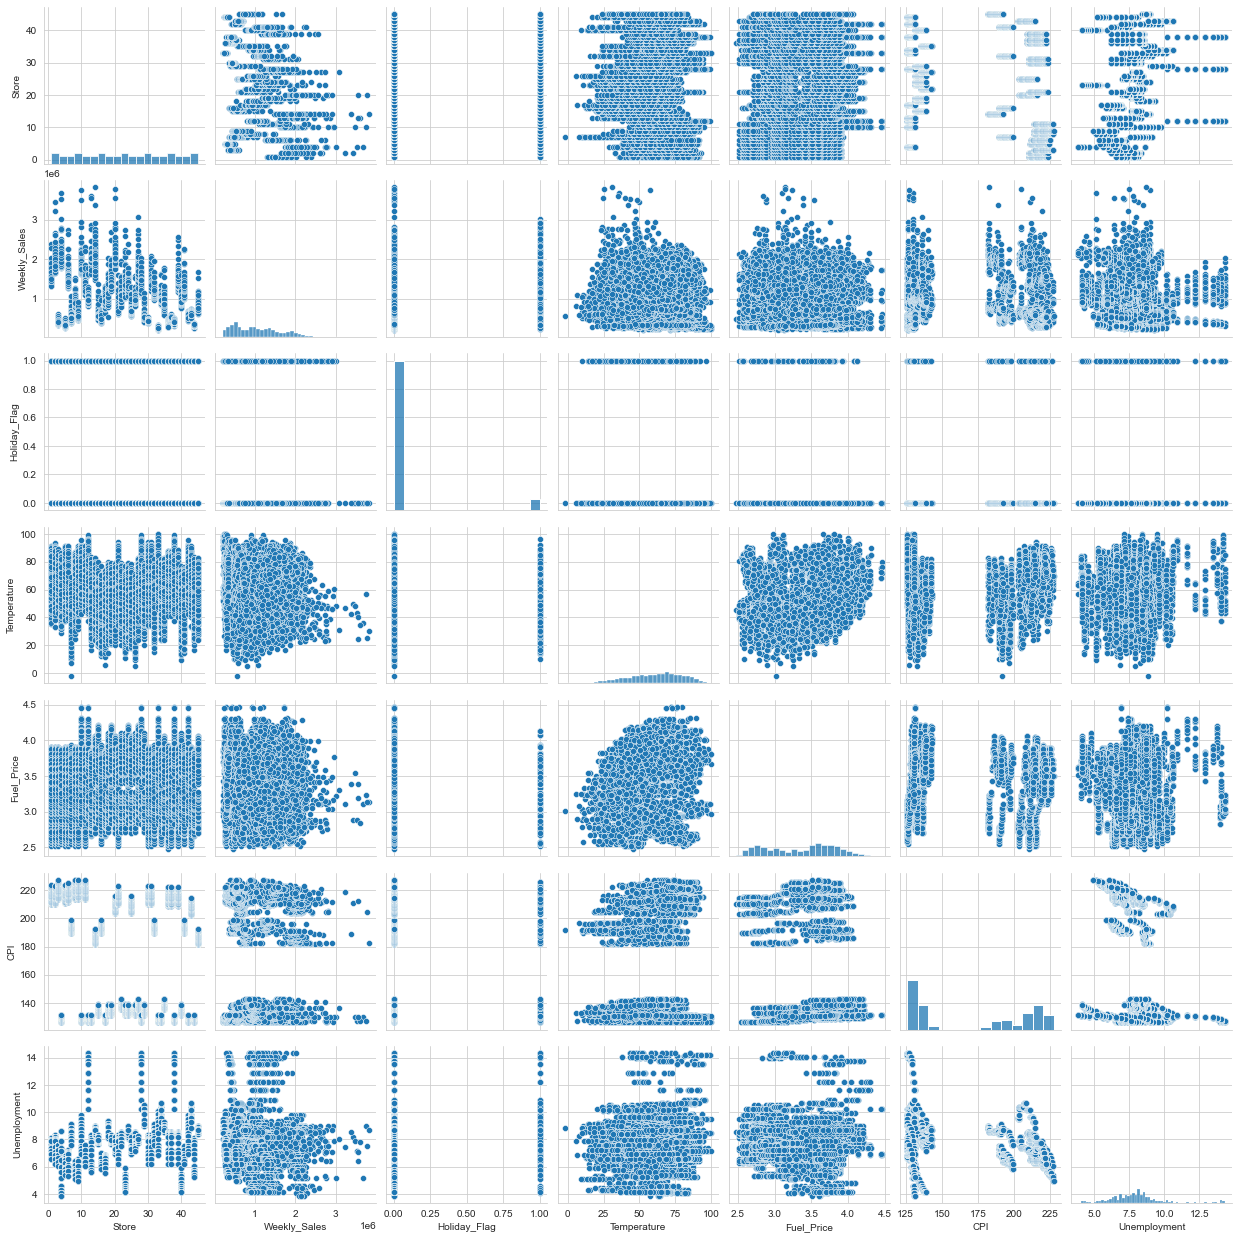

In [15]:
sns.set_style("whitegrid")
sns.pairplot(data)

Observations: Do not see any good relationship against the features or features Vs Target

In [16]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

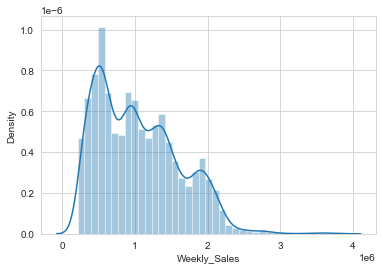

In [17]:
sns.distplot(data['Weekly_Sales'])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

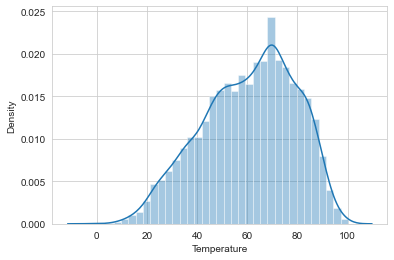

In [18]:
sns.distplot(data['Temperature'])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel_Price', ylabel='Density'>

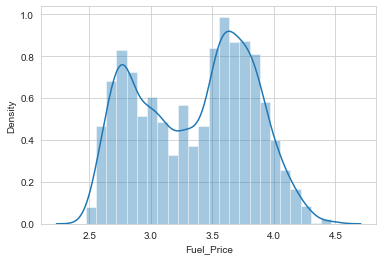

In [19]:
sns.distplot(data['Fuel_Price'])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

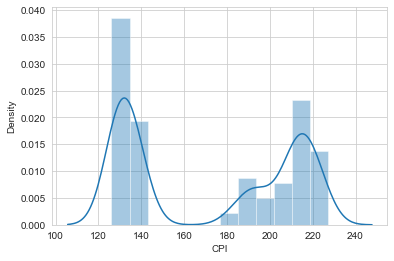

In [20]:
sns.distplot(data['CPI'])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

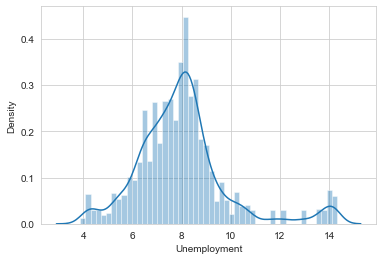

In [21]:
sns.distplot(data['Unemployment'])

C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

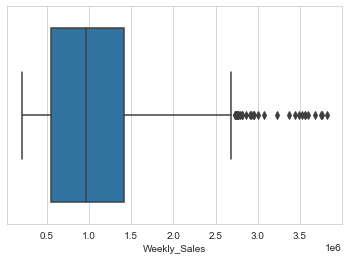

In [22]:
sns.boxplot(data['Weekly_Sales'], hue=data['Holiday_Flag'])

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

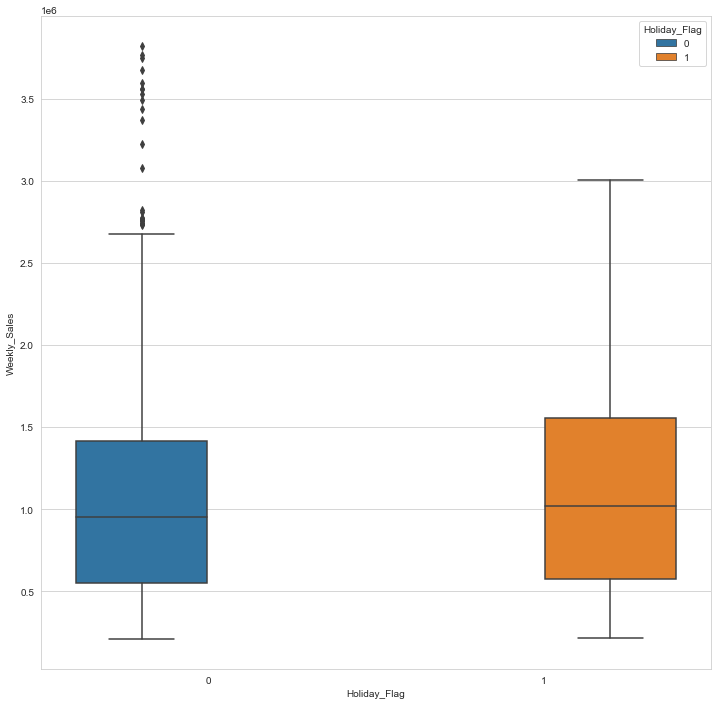

In [23]:
# Outliers
#fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
plt.figure(figsize=(12,12))
sns.boxplot(y='Weekly_Sales',x = 'Holiday_Flag', hue = 'Holiday_Flag',data = data)
#sns.boxplot(y='Weekly_Sales',x = 'Temperature', hue = 'Temperature',data = data , ax=axarr[0][1])
#sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
#sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
#sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
#sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

Observations: During holiday, sales are relatively high. But during non-holiday weeks, there are peak sales happened too

In [24]:
print('Max sales during holiday week is {}'.format(data[data['Holiday_Flag'] == 1]['Weekly_Sales'].max()))
print('Max sales during non-holiday week is {}'.format(data[data['Holiday_Flag'] == 0]['Weekly_Sales'].max()))

Max sales during holiday week is 3004702.33
Max sales during non-holiday week is 3818686.45


In [25]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [26]:
#Find the observations with high sales values during non-holiday week

data[(data['Holiday_Flag'] == 0) & (data['Weekly_Sales'] > 2700000)]
# Number of observations = 25

# I suppose these are not outliers but exceptional sales 
print(25/5985)

0.004177109440267335


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

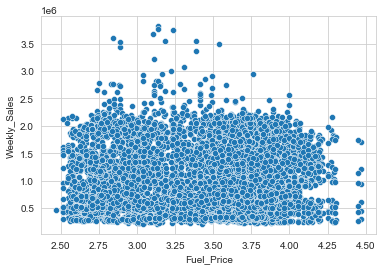

In [27]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)

Few exceptional sales have happened when fuel price is relatively less

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

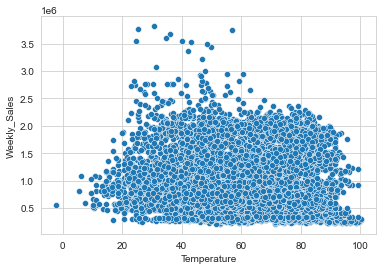

In [28]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)

Few exceptional sales have happened when Temperature is relatively less ( < 60)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

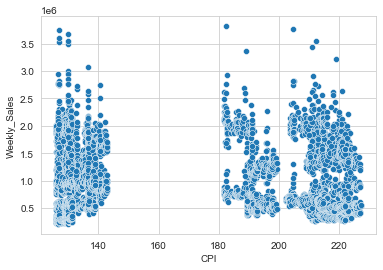

In [29]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)

Not able to observe any relation

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

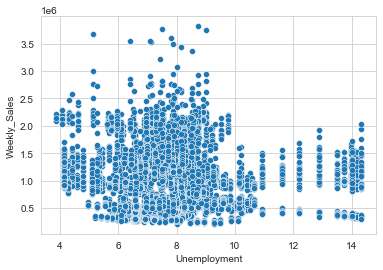

In [30]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)

Sales is more when unemployment is less

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

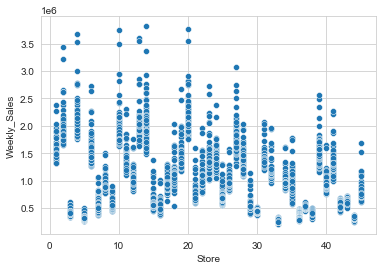

In [31]:
sns.scatterplot(x='Store', y='Weekly_Sales', data=data)

Few specific stores has recorded more sales

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

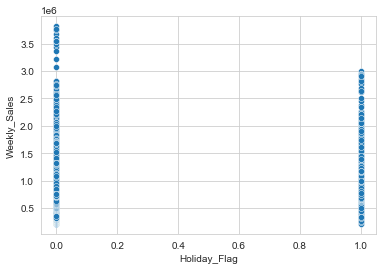

In [32]:
sns.scatterplot(x='Holiday_Flag', y='Weekly_Sales', data=data)

In [33]:
df_corr = data.corr()
(df_corr)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<AxesSubplot:>

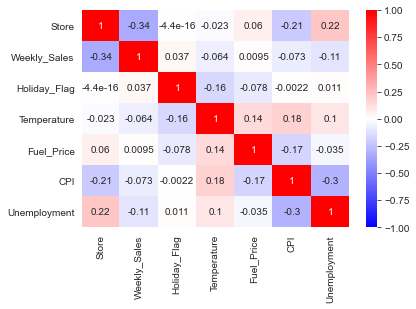

In [34]:
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1, cmap='bwr')

## Basic statistics Tasks
## Which store has maximum sales

In [37]:
max_sales = data['Weekly_Sales'].groupby(data['Store']).sum().sort_values(ascending=False)
print(max_sales)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


In [56]:
y = list(max_sales.values[0:10])
x = list(max_sales.keys()[0:10])
print(y, x)

[301397792.46000004, 299543953.38, 288999911.34000003, 286517703.80000013, 275382440.9800001, 271617713.8899999, 253855916.88000003, 223756130.64000002, 222402808.85000005, 207445542.46999997] [20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


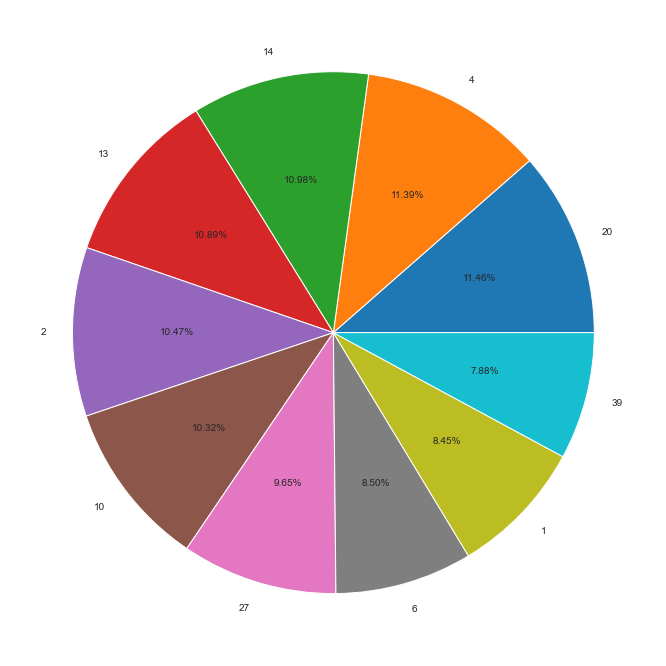

In [67]:
plt.figure(figsize=(12,12))
plt.pie(y, labels=x, autopct='%0.2f%%' )
plt.show()

<b> Highest sale recoded is 301397800$ by the store #20 </b>

## Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [68]:
df_stats = data['Weekly_Sales'].groupby(data['Store']).agg(['sum', 'mean', 'std']).sort_values('std', ascending=False)

In [69]:
df_stats['Co.eff of mean to std'] = df_stats['std']/df_stats['mean']

In [70]:
df_stats

,sum,mean,std,Co.eff of mean to std
Store,,,,
14,2.889999e+08,2.020978e+06,317569.949476,0.157137
10,2.716177e+08,1.899425e+06,302262.062504,0.159133
20,3.013978e+08,2.107677e+06,275900.562742,0.130903
4,2.995440e+08,2.094713e+06,266201.442297,0.127083
13,2.865177e+08,2.003620e+06,265506.995776,0.132514
23,1.987506e+08,1.389864e+06,249788.038068,0.179721
27,2.538559e+08,1.775216e+06,239930.135688,0.135155
2,2.753824e+08,1.925751e+06,237683.694682,0.123424
39,2.074455e+08,1.450668e+06,217466.454833,0.149908


<b> Store 14 has more standard deviation of 317569$ <b>

In [71]:
data[data['Store'] == 14]['Weekly_Sales'].std()

317569.9494755083

In [78]:
df_stats.reset_index(inplace=True)

In [82]:
df_stats[['std', 'Co.eff of mean to std']]

,std,Co.eff of mean to std
0,317569.949476,0.157137
1,302262.062504,0.159133
2,275900.562742,0.130903
3,266201.442297,0.127083
4,265506.995776,0.132514
5,249788.038068,0.179721
6,239930.135688,0.135155
7,237683.694682,0.123424
8,217466.454833,0.149908
9,212525.855862,0.135823


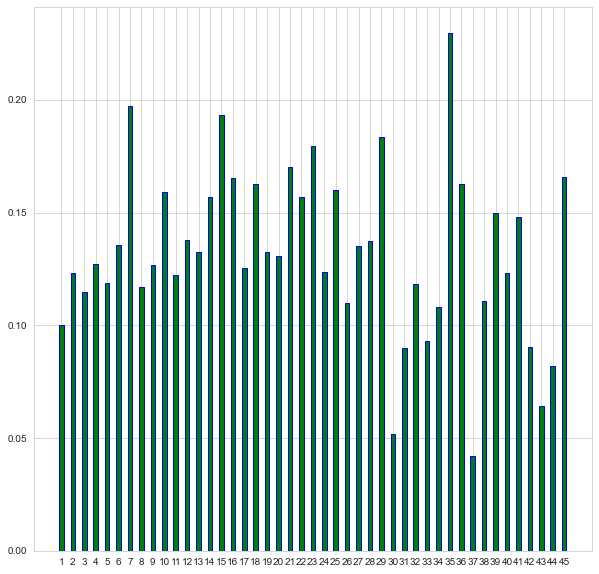

In [98]:
plt.figure(figsize=(10,10))
plt.bar(x=df_stats['Store'], height=df_stats['Co.eff of mean to std'], data=df_stats, color='green', edgecolor='blue', width=0.4, tick_label=df_stats['Store'])
plt.show()

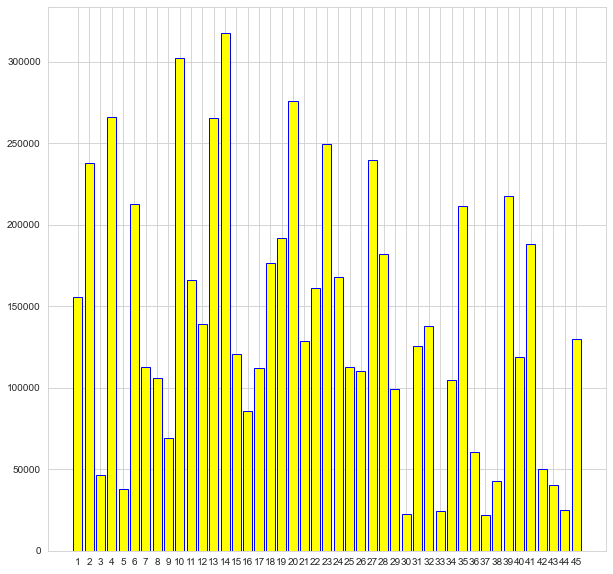

In [99]:
plt.figure(figsize=(10,10))
plt.bar(x=df_stats['Store'], height=df_stats['std'], data=df_stats, color='yellow', edgecolor='blue', tick_label=df_stats['Store'])
plt.show()

## Which store/s has good quarterly growth rate in Q3’2012

Q1 - Jan, Feb, Mar <br>
Q2 - Apr, May, Jun <br>
Q3 - July, Aug, Sep <br>
Q4 - Oct, Nov, Dec <br>

<b> Q3: 01-07-2012 till 30-09-2012 </b>

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [101]:
data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908
...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684


In [102]:
q3_2012 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')]['Weekly_Sales'].groupby(data['Store']).sum().sort_values(ascending=False)

In [103]:
q3_2012 = pd.DataFrame(q3_2012, index=None)
q3_2012

,Weekly_Sales
Store,
4,27796792.46
20,26891526.98
13,26421259.30
2,24303354.86
10,23037258.76
27,22307711.41
14,21187560.65
39,20715116.23
1,20253947.78


Highest sale was observed in store# 4 for Q3, 2012

In [104]:
data[(data['Date'] >= '2011-07-01') & (data['Date'] <= '2011-09-30')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
73,1,2011-07-01,1488538.09,0,85.55,3.524,215.184137,7.962
74,1,2011-07-08,1534849.64,0,85.83,3.480,215.277175,7.962
75,1,2011-07-15,1455119.97,0,88.54,3.575,215.361109,7.962
76,1,2011-07-22,1396926.82,0,85.77,3.651,215.422278,7.962
77,1,2011-07-29,1352219.79,0,86.83,3.682,215.483448,7.962
...,...,...,...,...,...,...,...,...
6374,45,2011-09-02,726482.39,0,70.63,3.703,186.618927,8.625
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6376,45,2011-09-16,711367.56,0,69.17,3.742,186.802400,8.625
6377,45,2011-09-23,714106.42,0,63.75,3.711,187.029532,8.625


In [105]:
#Compare Q3 2012 against Q3 2011 to find the store that has performed well comparing two years
q3_2011 = data[(data['Date'] >= '2011-07-01') & (data['Date'] <= '2011-09-30')]['Weekly_Sales'].groupby(data['Store']).sum().sort_values(ascending=False)
q3_2011 = pd.DataFrame(q3_2011)
q3_2011

,Weekly_Sales
Store,
4,28888165.93
20,28196615.83
14,27509662.21
13,27499449.78
2,24852062.86
27,24776784.22
10,24626956.14
6,20901950.12
1,20752182.38


In [106]:
quarter3_Year_comparison = pd.merge(q3_2012, q3_2011, on='Store', how='inner')
quarter3_Year_comparison['Diff_Q3'] = quarter3_Year_comparison['Weekly_Sales_x'] - quarter3_Year_comparison['Weekly_Sales_y']

In [107]:
quarter3_Year_comparison

,Weekly_Sales_x,Weekly_Sales_y,Diff_Q3
Store,,,
4,27796792.46,28888165.93,-1091373.47
20,26891526.98,28196615.83,-1305088.85
13,26421259.30,27499449.78,-1078190.48
2,24303354.86,24852062.86,-548708.00
10,23037258.76,24626956.14,-1589697.38
27,22307711.41,24776784.22,-2469072.81
14,21187560.65,27509662.21,-6322101.56
39,20715116.23,20220257.64,494858.59
1,20253947.78,20752182.38,-498234.60


In [108]:
quarter3_Year_comparison.sort_values('Diff_Q3', ascending=False)

,Weekly_Sales_x,Weekly_Sales_y,Diff_Q3
Store,,,
39,20715116.23,20220257.64,494858.59
18,13489765.27,13106653.75,383111.52
44,4411251.16,4202659.63,208591.53
38,5605482.38,5412680.85,192801.53
3,5298005.47,5242697.07,55308.40
41,18093844.01,18055275.48,38568.53
33,3433620.36,3463164.29,-29543.93
5,4163790.99,4209061.89,-45270.90
30,5594701.86,5655542.34,-60840.48


<b> Store# 39 has improved the sales by $494858.59 between Q3 2011 and Q3 2012 </b>

In [109]:
data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
113,1,2012-04-06,1899676.88,0,70.43,3.891,221.435611,7.143
114,1,2012-04-13,1621031.70,0,69.07,3.891,221.510210,7.143
115,1,2012-04-20,1521577.87,0,66.76,3.877,221.564074,7.143
116,1,2012-04-27,1468928.37,0,67.23,3.814,221.617937,7.143
117,1,2012-05-04,1684519.99,0,75.55,3.749,221.671800,7.143
...,...,...,...,...,...,...,...,...
6413,45,2012-06-01,837144.63,0,74.48,3.742,191.009171,8.567
6414,45,2012-06-08,795133.00,0,64.30,3.689,191.015533,8.567
6415,45,2012-06-15,821498.18,0,71.93,3.620,191.029973,8.567
6416,45,2012-06-22,822569.16,0,74.22,3.564,191.064610,8.567


In [110]:
q2_2012 = data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')]['Weekly_Sales'].groupby(data['Store']).sum().sort_values(ascending=False)
q2_2012 = pd.DataFrame(q2_2012)
q2_2012

,Weekly_Sales
Store,
4,28454363.67
20,27524197.32
13,27009207.14
14,25155535.41
2,25083604.88
10,23750369.17
27,22744012.75
1,20978760.12
6,20833909.92


In [111]:
Q3_Q2_2012_comparison = pd.merge(q3_2012, q2_2012, on='Store', how='inner')
Q3_Q2_2012_comparison

,Weekly_Sales_x,Weekly_Sales_y
Store,,
4,27796792.46,28454363.67
20,26891526.98,27524197.32
13,26421259.30,27009207.14
2,24303354.86,25083604.88
10,23037258.76,23750369.17
27,22307711.41,22744012.75
14,21187560.65,25155535.41
39,20715116.23,20214128.46
1,20253947.78,20978760.12


In [112]:
Q3_Q2_2012_comparison['Diff_Q3_Q2'] = Q3_Q2_2012_comparison['Weekly_Sales_x'] - Q3_Q2_2012_comparison['Weekly_Sales_y']

In [113]:
Q3_Q2_2012_comparison.sort_values('Diff_Q3_Q2', ascending=False)

,Weekly_Sales_x,Weekly_Sales_y,Diff_Q3_Q2
Store,,,
7,8262787.39,7290859.27,971928.12
16,7121541.64,6564335.98,557205.66
26,13675691.91,13155335.57,520356.34
39,20715116.23,20214128.46,500987.77
35,11322421.12,10838313.00,484108.12
41,18093844.01,17659942.73,433901.28
24,17976377.72,17684218.91,292158.81
23,18641489.15,18488882.82,152606.33
40,12873195.37,12727737.53,145457.84


<b> On comparing Q2 2012 and Q3 2012, store 7 has relatively imrpoved the weekly sales by $971928.12 </b>

## Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [129]:
Non_hol_mean = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
Non_hol_mean

1041256.3802088564

In [115]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [136]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#12-02-2010
#11-02-2011
#10-02-2012
#08-02-2013

def get_sales(date):
    return data[data['Date'] == date]['Weekly_Sales'].sum()

In [137]:
#data[data['Date'] == '12-02-2010']
print(get_sales('2010-02-12') > Non_hol_mean)
print(get_sales('2011-02-11') > Non_hol_mean)
print(get_sales('2012-02-10') > Non_hol_mean)
print(get_sales('2013-02-08') > Non_hol_mean)

True
True
True
False


## Super bowl holiday on 12-02-2010, 11-02-2011 & 10-02-2012 has sales greater than mean sales of non-holiday week

In [138]:
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#10-09-2010
#09-09-2011
#07-09-2012

print(get_sales('2010-09-10') > Non_hol_mean)
print(get_sales('2011-09-09') > Non_hol_mean)
print(get_sales('2012-09-07') > Non_hol_mean)

True
True
True


## Labour day had sales greater than mean of non-holidays weekly sales. Previous years had less sales compared to non-holiday weeks

In [141]:
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#26-11-2010
#25-11-2011
#23-11-2012

print(get_sales('2010-11-26') > Non_hol_mean)
print(get_sales('2011-11-25') > Non_hol_mean)

print(get_sales('2010-11-26')/Non_hol_mean)

True
True
63.21306115483062


## Thanksgiving day has recorded high sales more than the mean sales of non-holiday period

In [145]:
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
#31-12-2010
#30-12-2011

print(get_sales('2010-12-31') > Non_hol_mean)
print(get_sales('2011-12-30') > Non_hol_mean)

print(get_sales('2010-12-31')/Non_hol_mean)
print(get_sales('2011-12-30')/Non_hol_mean)

True
True
38.83051260813403
44.21817903364468


## Christmas sale is also higher than the mean sales during non-holiday period

In [143]:
#Super Bowl
SB1 = data[data['Date'] == '2010-02-12']['Weekly_Sales'].sum()
SB2 = data[data['Date'] == '2011-02-11']['Weekly_Sales'].sum()
SB3 = data[data['Date'] == '2012-02-10']['Weekly_Sales'].sum()
SB4 = data[data['Date'] == '2013-02-08']['Weekly_Sales'].sum()
SB = (SB1 + SB2 + SB3 + SB4)/4
print('Average of Super bowl sales is {}'.format(SB))

#Labour Day
LD1 = data[data['Date'] == '2010-09-10']['Weekly_Sales'].sum()
LD2 = data[data['Date'] == '2011-09-09']['Weekly_Sales'].sum()
LD3 = data[data['Date'] == '2012-09-07']['Weekly_Sales'].sum()
LD = (LD1 + LD2 + LD3)/3
print('Average of Labour Day sales is {}'.format(LD))

#Thanks Giving Day
TG1 = data[data['Date'] == '2010-11-26']['Weekly_Sales'].sum()
TG2 = data[data['Date'] == '2011-11-25']['Weekly_Sales'].sum()
TG = (TG1 + TG2)/2
print('Average of ThanksGiving Day sales is {}'.format(TG))

#Christmas
CM1 = data[data['Date'] == '2010-12-31']['Weekly_Sales'].sum()
CM2 = data[data['Date'] == '2011-12-30']['Weekly_Sales'].sum()
CM = (CM1 + CM2)/2
print('Average of Christmas Day sales is {}'.format(CM))

Average of Super bowl sales is 36420569.58500001
Average of Labour Day sales is 46909228.22666667
Average of ThanksGiving Day sales is 66207304.25
Average of Christmas Day sales is 43237490.02


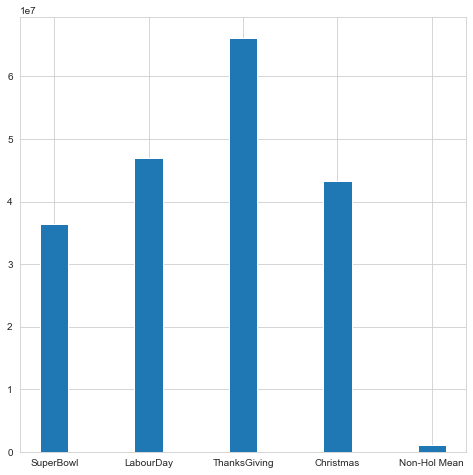

In [144]:
plt.figure(figsize=(8,8))
plt.bar(x=['SuperBowl', 'LabourDay', 'ThanksGiving', 'Christmas', 'Non-Hol Mean'], height=[SB, LD, TG, CM, Non_hol_mean], width=0.3)
plt.show()

## Thanksgiving has reported good average of high sales when compared to other holidays

## Provide a monthly and semester view of sales in units and give insights

In [161]:
def get_month(date):
    month = str(date).split('-')[1]
    
    if month == '01':
        month_label = "Jan"
    elif month == '02':
        month_label = "Feb"
    elif month == '03':
        month_label = "Mar"
    elif month == '04':
        month_label = "Apr"
    elif month == '05':
        month_label = "May"
    elif month == '06':
        month_label = "Jun"
    elif month == '07':
        month_label = "Jul"
    elif month == '08':
        month_label = "Aug"
    elif month == '09':
        month_label = "Sep"
    elif month == '10':
        month_label = "Oct"
    elif month == '11':
        month_label = "Nov"
    elif month == '12':
        month_label = "Dec"
    
    return month_label
    

In [162]:
def get_year(date):
    return str(date).split('-')[0]

In [163]:
get_month('2010-11-26')

'Nov'

In [164]:
get_year('2010-11-26')

'2010'

In [165]:
data['Month'] = data['Date'].apply(get_month)
data['Year'] = data['Date'].apply(get_year)

In [166]:
#data = data.drop(['MM-YYYY'], axis=1)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Feb,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Feb,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Feb,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Feb,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Mar,2010


In [167]:
data['Month'].value_counts()

Apr    630
Jul    630
Jun    585
Mar    585
Aug    585
Sep    585
Oct    585
May    540
Feb    540
Dec    450
Nov    360
Jan    360
Name: Month, dtype: int64

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   object        
 9   Year          6435 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 502.9+ KB


In [169]:
yearly_sales = data['Weekly_Sales'].groupby(data['Year']).sum()
print(yearly_sales)
yearly_sales = pd.DataFrame(yearly_sales)
yearly_sales = yearly_sales.reset_index()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


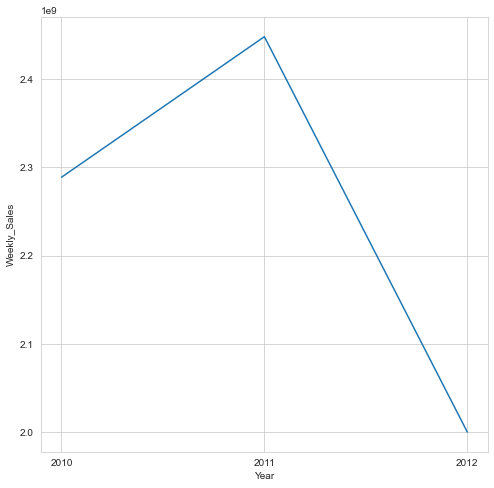

In [170]:
plt.figure(figsize=(8,8))
sns.lineplot(yearly_sales['Year'], yearly_sales['Weekly_Sales'])
plt.show()

In [171]:
print ('Yearly sale for 2010 is {}'.format(yearly_sales[yearly_sales['Year'] == '2010']['Weekly_Sales'][0]))
print ('Yearly sale for 2011 is {}'.format(yearly_sales[yearly_sales['Year'] == '2011']['Weekly_Sales'][1]))
print ('Yearly sale for 2012 is {}'.format(yearly_sales[yearly_sales['Year'] == '2012']['Weekly_Sales'][2]))

Yearly sale for 2010 is 2288886120.41
Yearly sale for 2011 is 2448200007.3499975
Yearly sale for 2012 is 2000132859.3500023


<b> Note: Remind that data is available only till October-2012 - 2months data not available in the data provided. <br>
2010 data also available from Feb-2010. Since we do not have whole year data for 2010 and 2012, we would not be able to compare against 2011 data </b>


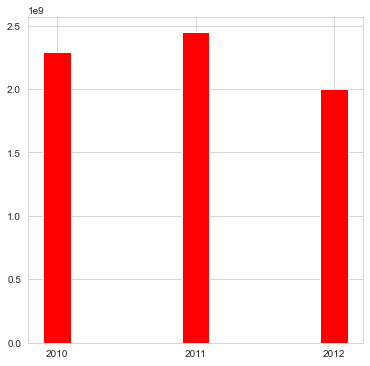

In [177]:
plt.figure(figsize=(6,6))
plt.bar(x=['2010', '2011', '2012'], height=yearly_sales['Weekly_Sales'], color='red', width=0.2)
plt.show()

In [178]:
data_pivot = data.pivot_table(index='Month', columns = 'Year', values='Weekly_Sales', aggfunc='sum')
print(data_pivot)

# Reindex the DataFrame with the `Month` variable to keep the same order of months as before
data_pivot = data_pivot.reindex(data['Month'], axis=0)
print(data_pivot)

Year           2010          2011          2012
Month                                          
Apr    2.314124e+08  2.265265e+08  1.889209e+08
Aug    1.876401e+08  1.885993e+08  2.368508e+08
Dec    2.887605e+08  2.880781e+08           NaN
Feb    1.903330e+08  1.863313e+08  1.920636e+08
Jan             NaN  1.637040e+08  1.688945e+08
Jul    2.325801e+08  2.299114e+08  1.875095e+08
Jun    1.922462e+08  1.897734e+08  2.406103e+08
Mar    1.819198e+08  1.793564e+08  2.315097e+08
May    1.867109e+08  1.816482e+08  1.887665e+08
Nov    2.028534e+08  2.101624e+08           NaN
Oct    2.171618e+08  1.832613e+08  1.843617e+08
Sep    1.772679e+08  2.208477e+08  1.806455e+08
Year           2010          2011          2012
Month                                          
Feb    1.903330e+08  1.863313e+08  1.920636e+08
Feb    1.903330e+08  1.863313e+08  1.920636e+08
Feb    1.903330e+08  1.863313e+08  1.920636e+08
Feb    1.903330e+08  1.863313e+08  1.920636e+08
Mar    1.819198e+08  1.793564e+08  2.315

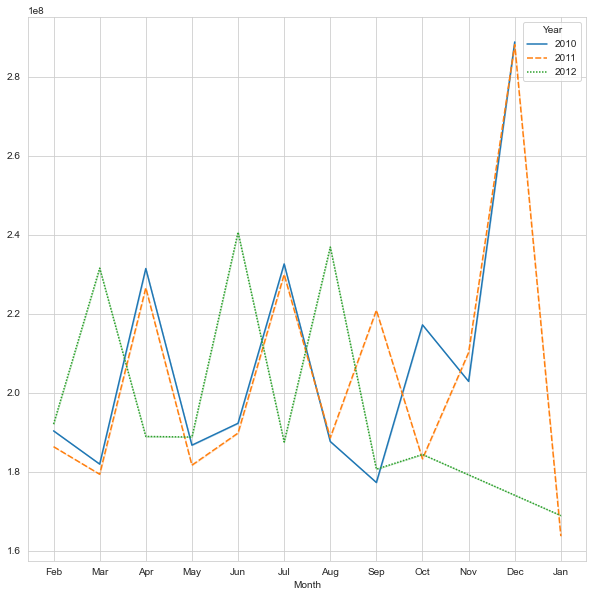

In [179]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data_pivot)
plt.show()

<b> Above graph gives a view on sales happened monthly wise for each year </b> <br>
<b> Observation: Most of the peak sales happens during Nov till Dec. Also relatively High sales are observed during Mar, Apr, Jun and Aug

In [180]:
#2011
#S1-2011 = 01-01-2011 till 30-06-2011
#S1-2011 = 01-07-2011 till 31-12-2011

S1_2011 = data[(data['Date'] >= '2011-01-01') & (data['Date'] <= '2011-06-30')]['Weekly_Sales'].sum()
S2_2011 = data[(data['Date'] >= '2011-07-01') & (data['Date'] <= '2011-12-31')]['Weekly_Sales'].sum()

S1_2012 = data[(data['Date'] >= '2012-01-01') & (data['Date'] <= '2012-06-30')]['Weekly_Sales'].sum()
S2_2012 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-12-31')]['Weekly_Sales'].sum()

S1_2010 = data[(data['Date'] >= '2010-01-01') & (data['Date'] <= '2010-06-30')]['Weekly_Sales'].sum()
S2_2010 = data[(data['Date'] >= '2010-07-01') & (data['Date'] <= '2010-12-31')]['Weekly_Sales'].sum()

In [181]:
print('S1_2010:', S1_2010)
print('S2_2010:', S2_2010)
print('S1_2011:', S1_2011)
print('S2_2011:', S2_2011)
print('S1_2012:', S1_2012)
print('S2_2012:', S2_2012)

S1_2010: 982622260.29
S2_2010: 1306263860.12
S1_2011: 1127339797.31
S2_2011: 1320860210.04
S1_2012: 1210765416.38
S2_2012: 789367442.97


In [182]:
semester_sales = {'Semester':['S1_2010', 'S2_2010', 'S1_2011', 'S2_2011', 'S1_2012', 'S2_2012'],
        'Age':[S1_2010, S2_2010, S1_2011, S2_2011, S1_2012, S2_2012]}
semester_sales = pd.DataFrame(semester_sales)
semester_sales

,Semester,Age
0,S1_2010,9.826223e+08
1,S2_2010,1.306264e+09
2,S1_2011,1.127340e+09
3,S2_2011,1.320860e+09
4,S1_2012,1.210765e+09
5,S2_2012,7.893674e+08


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Semester', ylabel='Age'>

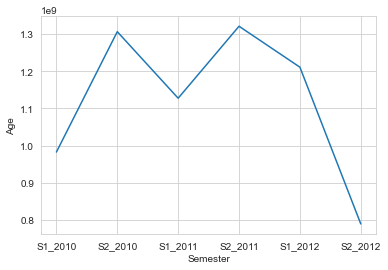

In [183]:
sns.lineplot('Semester', 'Age', data=semester_sales)

<b> Semester 1 of 2010 > S1 of 2011 > S1 of 2012 <br>
Semester 2 of 2010 > S2 of 2011 (data incomplete for 2012)

## For Store 1 – Build  prediction models to forecast demand

In [186]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                   object
Year                    object
dtype: object

In [188]:
#Date and year can be dropped
data = data.drop(['Date', 'Year'], axis=1)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Month         6435 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
##Apply one-Hot encoding to Store and Month

store_ohe = pd.get_dummies(data['Store'])
month_ohe = pd.get_dummies(data['Month'])
data = data.drop(['Store', 'Month'], axis=1)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 301.8 KB


In [201]:
data = data.join(store_ohe)
data = data.join(month_ohe)

In [202]:
data.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,4,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1643690.90,0,42.31,2.572,211.096358,8.106,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Scale the data

In [206]:
scaler = StandardScaler()

In [209]:
data['Temperature'] = scaler.fit_transform(data[['Temperature']])
data['Fuel_Price'] = scaler.fit_transform(data[['Fuel_Price']])
data['CPI'] = scaler.fit_transform(data[['CPI']])
data['Unemployment'] = scaler.fit_transform(data[['Unemployment']])

In [210]:
data.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,4,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1643690.90,0,-0.995136,-1.713800,1.004175,0.056964,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1641957.44,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1611968.17,0,-1.124178,-1.840166,1.009074,0.056964,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1409727.59,0,-0.760907,-1.737766,1.009849,0.056964,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1554806.68,0,-0.767955,-1.598328,1.010624,0.056964,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


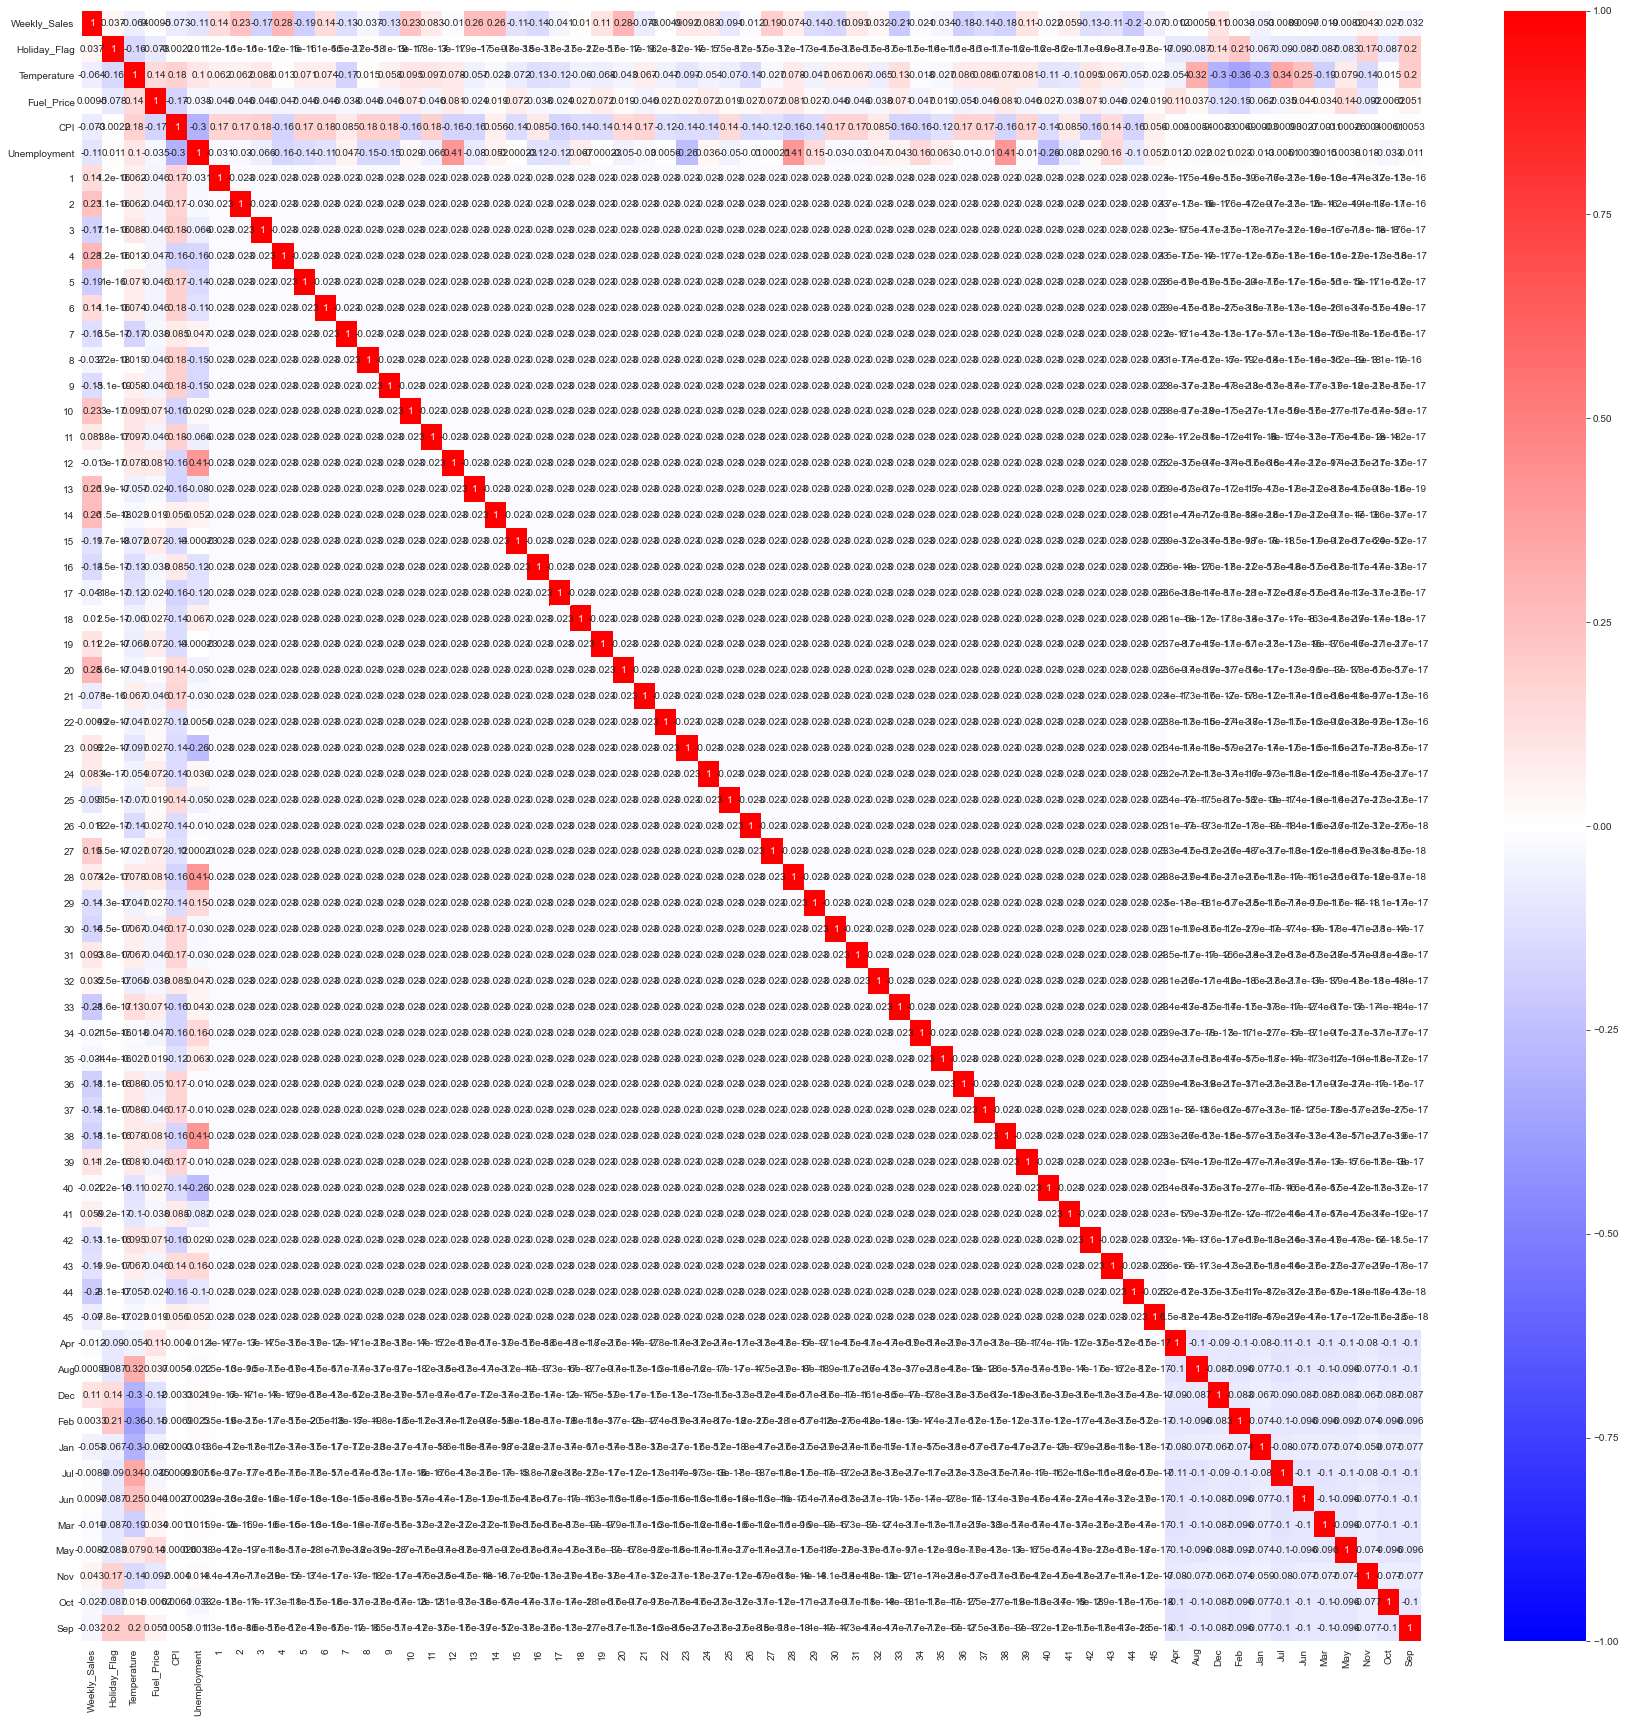

In [223]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='bwr')
plt.show()

In [219]:
X = data.drop('Weekly_Sales', axis=1)
Y = data['Weekly_Sales']
print(X.shape, Y.shape)

(6435, 62) (6435,)


### Train_Test_Split

In [220]:
x_train, x_test,y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4504, 62) (1931, 62) (4504,) (1931,)


### Linear Regression


In [221]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [222]:
lr.coef_

array([ 2.80908732e+04,  1.55178361e+04, -1.16058526e+04,  6.58701504e+04,
       -4.87991052e+04,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  8.44660164e+15,  8.44660164e+15,
        8.44660164e+15,  8.44660164e+15,  1.68164802e+17,  1.68164802e+17,
        1.68164802e+17,  

In [224]:
y_predict = lr.predict(x_test)
print(y_predict[0:10])

[2086528.  390880. 1396672.  732928.  283488. 2071104.  511680.  477600.
  962208. 2048384.]


In [247]:
r2score = r2_score(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
print('Test R2 Score is {}                '.format(r2score))
print('Test Mean Squared Error Score is {}'.format(MSE))

Test R2 Score is 0.9374899557017222                
Test Mean Squared Error Score is 20127561367.489735


In [246]:
y_predict_train = lr.predict(x_train)
r2score_train = r2_score(y_train, y_predict_train)
MSE_train = mean_squared_error(y_train, y_predict_train)
print('Train R2 Score is {}                '.format(r2score_train))
print('Train Mean Squared Error Score is {}'.format(MSE_train))

Train R2 Score is 0.9369108440695442                
Train Mean Squared Error Score is 19995006727.558594


C:\Users\SAIRAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


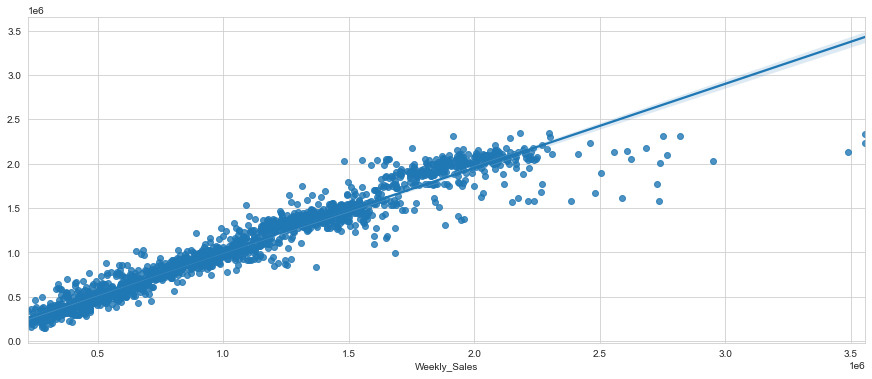

In [230]:
plt.figure(figsize=(15,6))
sns.regplot(y_test, y_predict)
plt.show()

In [239]:
error = y_test - y_predict
d = {'Actual': y_test, 'Predicted': y_predict, 'Error': error}
error_stats = pd.DataFrame(d)
error_stats.reset_index(inplace=True)
error_stats

,index,Actual,Predicted,Error
0,447,1870619.23,2086528.0,-215908.77
1,2196,448391.99,390880.0,57511.99
2,3253,1272948.27,1396672.0,-123723.73
3,2873,744969.42,732928.0,12041.42
4,712,325345.41,283488.0,41857.41
...,...,...,...,...
1926,4679,236920.49,158688.0,78232.49
1927,1134,936373.65,927808.0,8565.65
1928,221,1876704.26,1928992.0,-52287.74
1929,6122,593138.59,643488.0,-50349.41


In [242]:
print(error_stats['Error'].min())
print(error_stats['Error'].max())

-553957.3400000001
1359570.8900000001


## Stats Model Linear regression

In [274]:
import statsmodels.formula.api as smf

In [293]:
data1 = X.join(Y)
print(data1.shape, data1.columns)

(6435, 63) Index(['Holiday_Flag',  'Temperature',   'Fuel_Price',          'CPI',
       'Unemployment',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33,             34,             35,
                   36,             37,             38,             39,
                   40,             41,             42,             43,
                   44,             45,          'Apr',          'Aug',
                'Dec',          'Feb',          'Jan',          'J

In [294]:
cols = list(data.drop('Weekly_Sales', axis=1).columns)
#cols = [str(x) for x in cols]
cols

dc = {}
for i in cols:
    if isinstance(i, int):
        dc[i] = 'store_' + str(i)
    else:
        dc[i] = str(i)

print(dc)

{'Holiday_Flag': 'Holiday_Flag', 'Temperature': 'Temperature', 'Fuel_Price': 'Fuel_Price', 'CPI': 'CPI', 'Unemployment': 'Unemployment', 1: 'store_1', 2: 'store_2', 3: 'store_3', 4: 'store_4', 5: 'store_5', 6: 'store_6', 7: 'store_7', 8: 'store_8', 9: 'store_9', 10: 'store_10', 11: 'store_11', 12: 'store_12', 13: 'store_13', 14: 'store_14', 15: 'store_15', 16: 'store_16', 17: 'store_17', 18: 'store_18', 19: 'store_19', 20: 'store_20', 21: 'store_21', 22: 'store_22', 23: 'store_23', 24: 'store_24', 25: 'store_25', 26: 'store_26', 27: 'store_27', 28: 'store_28', 29: 'store_29', 30: 'store_30', 31: 'store_31', 32: 'store_32', 33: 'store_33', 34: 'store_34', 35: 'store_35', 36: 'store_36', 37: 'store_37', 38: 'store_38', 39: 'store_39', 40: 'store_40', 41: 'store_41', 42: 'store_42', 43: 'store_43', 44: 'store_44', 45: 'store_45', 'Apr': 'Apr', 'Aug': 'Aug', 'Dec': 'Dec', 'Feb': 'Feb', 'Jan': 'Jan', 'Jul': 'Jul', 'Jun': 'Jun', 'Mar': 'Mar', 'May': 'May', 'Nov': 'Nov', 'Oct': 'Oct', 'Sep': 

In [297]:
data_new = data1.rename(mapper=dc, axis=1)

cols1 = list(data_new.drop('Weekly_Sales', axis=1).columns)
data_new.head()
#cols1

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,store_1,store_2,store_3,store_4,store_5,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Weekly_Sales
0,0,-0.995136,-1.713800,1.004175,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1643690.90
1,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1641957.44
2,0,-1.124178,-1.840166,1.009074,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1611968.17
3,0,-0.760907,-1.737766,1.009849,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1409727.59
4,0,-0.767955,-1.598328,1.010624,0.056964,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1554806.68


In [298]:
formula = 'Weekly_Sales ~ ' + ' + '.join(cols1)
formula

'Weekly_Sales ~ Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment + store_1 + store_2 + store_3 + store_4 + store_5 + store_6 + store_7 + store_8 + store_9 + store_10 + store_11 + store_12 + store_13 + store_14 + store_15 + store_16 + store_17 + store_18 + store_19 + store_20 + store_21 + store_22 + store_23 + store_24 + store_25 + store_26 + store_27 + store_28 + store_29 + store_30 + store_31 + store_32 + store_33 + store_34 + store_35 + store_36 + store_37 + store_38 + store_39 + store_40 + store_41 + store_42 + store_43 + store_44 + store_45 + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep'

In [299]:
lm = smf.ols(formula=formula, data=data_new).fit()

In [300]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1590.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:05:30   Log-Likelihood:                -85438.
No. Observations:                6435   AIC:                         1.710e+05
Df Residuals:                    6374   BIC:                         1.714e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.492e+05   1780.260    533.197      0.000    9.46e+05    9.53e+05
Holiday_Flag  3.229e+04   7662.269      4.214      0.000    1.73e+04    4.73e+04
Temperature   1.283e+04   6182.342      2.075      0.038     709.837    2.49e+04
Fuel_Price   -1.163e+04   3168.412     -3.670      0.000   -1.78e+04   -5417.994
CPI           3.569e+04   3.74e+04      0.955      0.340   -3.76e+04    1.09e+05
Unemployment -5.953e+04   7209.669     -8.258      0.000   -7.37e+04   -4.54e+04
store_1       4.679e+05   4.38e+04     10.681      0.000    3.82e+05    5.54e+05
store_2       8.392e+05   4.35e+04     19.288      0.000    7.54e+05    9.25e+05
store_3      -7.036e+05   4.64e+04    -15.169      0.000   -7.95e+05   -6.13e+05
store_4       1.038e+06   4.54e+04     22.859      0.000    9.49e+05    1.13e+06
store_5      -8.123e+05   4.29e+04    -18.947      0.000   -8.96e+05   -7.28e+05
store_6       4.432e+05   4.41e+04     10.056      0.000    3.57e+05     5.3e+05
store_7      -4.451e+05   2.66e+04    -16.744      0.000   -4.97e+05   -3.93e+05
store_8      -2.259e+05   4.53e+04     -4.985      0.000   -3.15e+05   -1.37e+05
store_9      -5.942e+05   4.55e+04    -13.072      0.000   -6.83e+05   -5.05e+05
store_10      9.215e+05   4.32e+04     21.319      0.000    8.37e+05    1.01e+06
store_11      2.493e+05   4.64e+04      5.373      0.000    1.58e+05     3.4e+05
store_12      1.841e+05    4.1e+04      4.487      0.000    1.04e+05    2.64e+05
store_13       9.88e+05   4.37e+04     22.635      0.000    9.02e+05    1.07e+06
store_14      1.006e+06    1.9e+04     52.865      0.000    9.69e+05    1.04e+06
store_15     -3.578e+05   3.75e+04     -9.539      0.000   -4.31e+05   -2.84e+05
store_16      -5.67e+05   2.41e+04    -23.571      0.000   -6.14e+05    -5.2e+05
store_17     -1.313e+05   4.45e+04     -2.947      0.003   -2.19e+05    -4.4e+04
store_18      1.258e+05   3.58e+04      3.508      0.000    5.55e+04    1.96e+05
store_19      4.635e+05   3.75e+04     12.358      0.000     3.9e+05    5.37e+05
store_20      1.033e+06   3.65e+04     28.292      0.000    9.61e+05     1.1e+06
store_21     -3.309e+05   4.35e+04     -7.605      0.000   -4.16e+05   -2.46e+05
store_22      4.052e+04   3.33e+04      1.217      0.224   -2.48e+04    1.06e+05
store_23      3.058e+05    4.3e+04      7.108      0.000    2.21e+05     3.9e+05
store_24      3.884e+05   3.69e+04     10.521      0.000    3.16e+05    4.61e+05
store_25     -3.656e+05   3.66e+04     -9.979      0.000   -4.37e+05   -2.94e+05
store_26      2.004e+04   3.73e+04      0.537      0.591   -5.31e+04    9.31e+04
store_27      7.869e+05    3.4e+04     23.156      0.000     7.2e+05    8.53e+05
store_28      4.986e+05    4.1e+04     12.153      0.000    4.18e+05    5.79e+05
store_29     -3.898e+05    3.5e+04    -11.152      0.000   -4.58e+05   -3.21e+05
store

<b>P-Val is probability to accept the H0: which states no relationship exists between feature and target
Having said that, P-val of CPI is 38% which says it is partially no much relationship exists between CPI and Sales (to some extent) <br> <br> Except CPI, other variables Unemployment, Temperature and Fuel have relationship towards the SALES </b>

## Repeat the experiment with one more additional derived feature called Day

In [351]:
data.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,1,2,3,4,5,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Weekly_Sales
0,0,-0.995136,-1.713800,1.004175,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1643690.90
1,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1641957.44
2,0,-1.124178,-1.840166,1.009074,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1611968.17
3,0,-0.760907,-1.737766,1.009849,0.056964,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1409727.59
4,0,-0.767955,-1.598328,1.010624,0.056964,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1554806.68


In [352]:
data_again = pd.read_csv(r'Walmart_Store_sales.csv')
print(data_new.shape, data_again.shape)

(6435, 65) (6435, 8)


In [353]:
data_new['Date'] = data_again['Date']

In [354]:
data_new.head()
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Holiday_Flag  6435 non-null   int64  
 1   Temperature   6435 non-null   float64
 2   Fuel_Price    6435 non-null   float64
 3   CPI           6435 non-null   float64
 4   Unemployment  6435 non-null   float64
 5   store_1       6435 non-null   uint8  
 6   store_2       6435 non-null   uint8  
 7   store_3       6435 non-null   uint8  
 8   store_4       6435 non-null   uint8  
 9   store_5       6435 non-null   uint8  
 10  store_6       6435 non-null   uint8  
 11  store_7       6435 non-null   uint8  
 12  store_8       6435 non-null   uint8  
 13  store_9       6435 non-null   uint8  
 14  store_10      6435 non-null   uint8  
 15  store_11      6435 non-null   uint8  
 16  store_12      6435 non-null   uint8  
 17  store_13      6435 non-null   uint8  
 18  store_14      6435 non-null 

In [355]:
data_new['Date'] = pd.to_datetime(data_new['Date'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_Flag  6435 non-null   int64         
 1   Temperature   6435 non-null   float64       
 2   Fuel_Price    6435 non-null   float64       
 3   CPI           6435 non-null   float64       
 4   Unemployment  6435 non-null   float64       
 5   store_1       6435 non-null   uint8         
 6   store_2       6435 non-null   uint8         
 7   store_3       6435 non-null   uint8         
 8   store_4       6435 non-null   uint8         
 9   store_5       6435 non-null   uint8         
 10  store_6       6435 non-null   uint8         
 11  store_7       6435 non-null   uint8         
 12  store_8       6435 non-null   uint8         
 13  store_9       6435 non-null   uint8         
 14  store_10      6435 non-null   uint8         
 15  store_11      6435 non-null   uint8   

In [356]:
data_new['Day'] = data_new['Date'].dt.day

In [357]:
data_new.head()
data_new1 = data_new.drop('Date', axis=1)
data_new1.columns

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'store_1', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6',
       'store_7', 'store_8', 'store_9', 'store_10', 'store_11', 'store_12',
       'store_13', 'store_14', 'store_15', 'store_16', 'store_17', 'store_18',
       'store_19', 'store_20', 'store_21', 'store_22', 'store_23', 'store_24',
       'store_25', 'store_26', 'store_27', 'store_28', 'store_29', 'store_30',
       'store_31', 'store_32', 'store_33', 'store_34', 'store_35', 'store_36',
       'store_37', 'store_38', 'store_39', 'store_40', 'store_41', 'store_42',
       'store_43', 'store_44', 'store_45', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Weekly_Sales', 'Day'],
      dtype='object')

In [ ]:
Day_onh = pd.get_dummies(data_new1['Day'])
data_new1 = data_new1.join(Day_onh)

In [360]:
data_new1

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,store_1,store_2,store_3,store_4,store_5,...,22,23,24,25,26,27,28,29,30,31
0,0,-0.995136,-1.713800,1.004175,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-1.124178,-1.840166,1.009074,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.760907,-1.737766,1.009849,0.056964,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-0.767955,-1.598328,1.010624,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0.228602,1.390883,0.519270,0.365109,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6431,0,0.229144,1.364738,0.523256,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,0,-0.335825,1.397419,0.527241,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6433,0,-0.227385,1.329879,0.527332,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
cols = list(data_new1.drop('Weekly_Sales', axis=1).columns)
#cols = [str(x) for x in cols]
cols

dc = {}
for i in cols:
    if isinstance(i, int):
        dc[i] = 'day_' + str(i)
    else:
        dc[i] = str(i)

print(dc)

{'Holiday_Flag': 'Holiday_Flag', 'Temperature': 'Temperature', 'Fuel_Price': 'Fuel_Price', 'CPI': 'CPI', 'Unemployment': 'Unemployment', 'store_1': 'store_1', 'store_2': 'store_2', 'store_3': 'store_3', 'store_4': 'store_4', 'store_5': 'store_5', 'store_6': 'store_6', 'store_7': 'store_7', 'store_8': 'store_8', 'store_9': 'store_9', 'store_10': 'store_10', 'store_11': 'store_11', 'store_12': 'store_12', 'store_13': 'store_13', 'store_14': 'store_14', 'store_15': 'store_15', 'store_16': 'store_16', 'store_17': 'store_17', 'store_18': 'store_18', 'store_19': 'store_19', 'store_20': 'store_20', 'store_21': 'store_21', 'store_22': 'store_22', 'store_23': 'store_23', 'store_24': 'store_24', 'store_25': 'store_25', 'store_26': 'store_26', 'store_27': 'store_27', 'store_28': 'store_28', 'store_29': 'store_29', 'store_30': 'store_30', 'store_31': 'store_31', 'store_32': 'store_32', 'store_33': 'store_33', 'store_34': 'store_34', 'store_35': 'store_35', 'store_36': 'store_36', 'store_37': 'stor

In [362]:
data_new1 = data_new1.rename(mapper=dc, axis=1)
data_new1

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,store_1,store_2,store_3,store_4,store_5,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,-0.995136,-1.713800,1.004175,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.201170,-1.766089,1.007880,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-1.124178,-1.840166,1.009074,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.760907,-1.737766,1.009849,0.056964,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-0.767955,-1.598328,1.010624,0.056964,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0.228602,1.390883,0.519270,0.365109,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6431,0,0.229144,1.364738,0.523256,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,0,-0.335825,1.397419,0.527241,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6433,0,-0.227385,1.329879,0.527332,0.356046,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
formula = 'Weekly_Sales ~ ' + ' + '.join(list(data_new1.drop('Weekly_Sales', axis=1).columns))
formula

'Weekly_Sales ~ Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment + store_1 + store_2 + store_3 + store_4 + store_5 + store_6 + store_7 + store_8 + store_9 + store_10 + store_11 + store_12 + store_13 + store_14 + store_15 + store_16 + store_17 + store_18 + store_19 + store_20 + store_21 + store_22 + store_23 + store_24 + store_25 + store_26 + store_27 + store_28 + store_29 + store_30 + store_31 + store_32 + store_33 + store_34 + store_35 + store_36 + store_37 + store_38 + store_39 + store_40 + store_41 + store_42 + store_43 + store_44 + store_45 + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep + Day + day_1 + day_2 + day_3 + day_4 + day_5 + day_6 + day_7 + day_8 + day_9 + day_10 + day_11 + day_12 + day_13 + day_14 + day_15 + day_16 + day_17 + day_18 + day_19 + day_20 + day_21 + day_22 + day_23 + day_24 + day_25 + day_26 + day_27 + day_28 + day_29 + day_30 + day_31'

In [367]:
lm = smf.ols(formula=formula, data=data_new1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1275.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:32:24   Log-Likelihood:                -84863.
No. Observations:                6435   AIC:                         1.699e+05
Df Residuals:                    6344   BIC:                         1.705e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      8.85e+05   3117.330    283.893      0.000    8.79e+05    8.91e+05
Holiday_Flag -1.459e+04   9274.045     -1.573      0.116   -3.28e+04    3589.580
Temperature   2.276e+04   6251.811      3.641      0.000    1.05e+04     3.5e+04
Fuel_Price   -1.086e+04   2986.194     -3.635      0.000   -1.67e+04   -5001.137
CPI           6.421e+04   3.49e+04      1.840      0.066   -4188.622    1.33e+05
Unemployment -6.184e+04   6646.208     -9.305      0.000   -7.49e+04   -4.88e+04
store_1         4.3e+05   4.09e+04     10.519      0.000     3.5e+05     5.1e+05
store_2       8.016e+05   4.06e+04     19.749      0.000    7.22e+05    8.81e+05
store_3      -7.463e+05   4.33e+04    -17.230      0.000   -8.31e+05   -6.61e+05
store_4       1.065e+06   4.22e+04     25.252      0.000    9.82e+05    1.15e+06
store_5      -8.529e+05   4.01e+04    -21.270      0.000   -9.32e+05   -7.74e+05
store_6       4.021e+05   4.12e+04      9.761      0.000    3.21e+05    4.83e+05
store_7      -4.503e+05   2.49e+04    -18.093      0.000   -4.99e+05   -4.02e+05
store_8      -2.651e+05   4.24e+04     -6.251      0.000   -3.48e+05   -1.82e+05
store_9      -6.364e+05   4.25e+04    -14.964      0.000    -7.2e+05   -5.53e+05
store_10       9.45e+05   4.04e+04     23.392      0.000    8.66e+05    1.02e+06
store_11      2.061e+05   4.33e+04      4.757      0.000    1.21e+05    2.91e+05
store_12      2.144e+05   3.87e+04      5.547      0.000    1.39e+05     2.9e+05
store_13       1.02e+06   4.06e+04     25.134      0.000    9.41e+05     1.1e+06
store_14       9.96e+05   1.76e+04     56.590      0.000    9.62e+05    1.03e+06
store_15     -3.285e+05    3.5e+04     -9.395      0.000   -3.97e+05    -2.6e+05
store_16     -5.777e+05   2.26e+04    -25.546      0.000   -6.22e+05   -5.33e+05
store_17     -9.561e+04   4.14e+04     -2.309      0.021   -1.77e+05   -1.44e+04
store_18      1.556e+05   3.35e+04      4.650      0.000       9e+04    2.21e+05
store_19      4.927e+05    3.5e+04     14.094      0.000    4.24e+05    5.61e+05
store_20      1.006e+06   3.41e+04     29.521      0.000     9.4e+05    1.07e+06
store_21     -3.689e+05   4.06e+04     -9.088      0.000   -4.48e+05   -2.89e+05
store_22      6.574e+04    3.1e+04      2.119      0.034    4934.738    1.27e+05
store_23      3.331e+05   3.98e+04      8.360      0.000    2.55e+05    4.11e+05
store_24      4.171e+05   3.44e+04     12.114      0.000     3.5e+05    4.85e+05
store_25     -3.905e+05   3.42e+04    -11.407      0.000   -4.58e+05   -3.23e+05
store_26      5.391e+04   3.48e+04      1.551      0.121   -1.42e+04    1.22e+05
store_27      8.105e+05   3.17e+04     25.601      0.000    7.48e+05    8.73e+05
store_28      5.289e+05   3.87e+04     13.683      0.000    4.53e+05    6.05e+05
store_29     -3.596e+05   3.27e+04    -10.999      0.000   -4.24e+05   -2.96e+05
store

## With above summary, all the four independant variables Holiday_Flag, Temperature, Fuel_Price, CPI & Unemployment are important for Weekly_Sales

## SKLearn Model

In [371]:
X = data_new1.drop('Weekly_Sales', axis=1)
Y = data_new1['Weekly_Sales']
print(X.shape, Y.shape)

(6435, 94) (6435,)


In [372]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=17)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(5148, 94) (1287, 94) (5148,) (1287,)


In [373]:
lm1 = LinearRegression()
lm1.fit(train_x, train_y)

LinearRegression()

In [378]:
print('Train accuracy is {}'.format(lm1.score(train_x, train_y)))

Train accuracy is 0.9475561514799974


In [379]:
pred_y = lm1.predict(test_x)

In [381]:
print('Train accuracy is {}'.format(lm1.score(test_x, test_y)))

Train accuracy is 0.9462937579418959
